In [21]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

In [2]:
import matplotlib.pyplot as plt

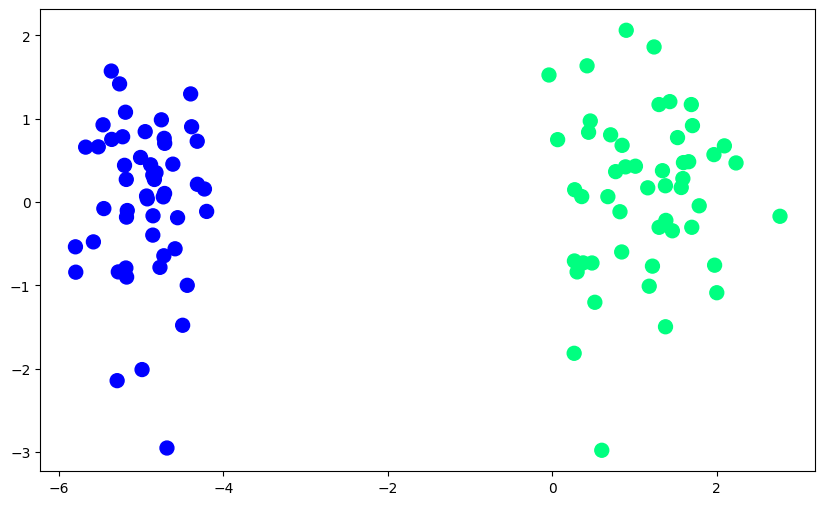

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

## Using Step Funtion

In [13]:
def step(z):
    return 1 if z>0 else 0

In [14]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        

In [15]:
intercept_,coef_ = perceptron(X,y)

In [16]:
print(coef_)
print(intercept_)

[1.1134548  0.33857969]
1.3000000000000003


In [17]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [18]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

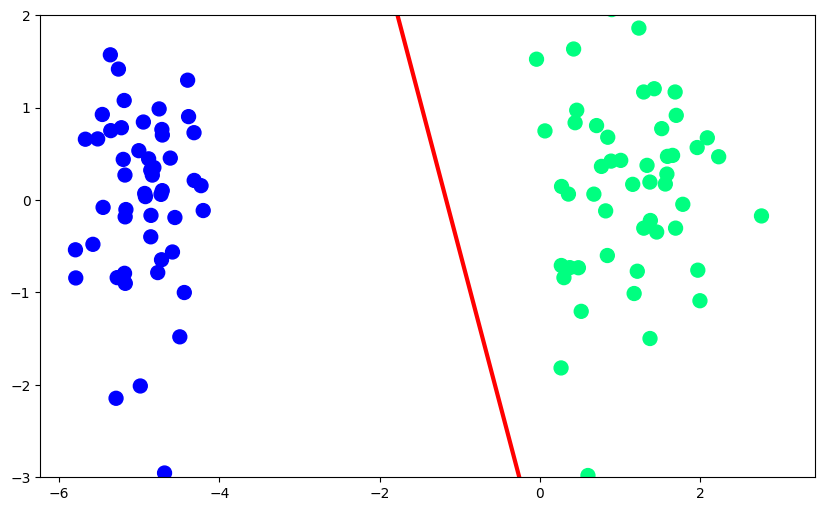

In [19]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Using sklearn Logistic Function

In [24]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [25]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [26]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

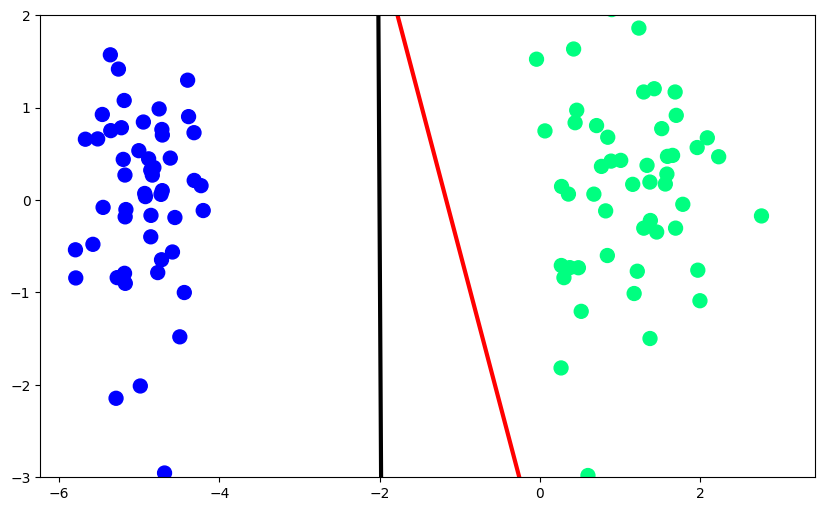

In [27]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Using Sigmoid

In [28]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [29]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [30]:
intercept_,coef_ = perceptron(X,y)

In [31]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [32]:
x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

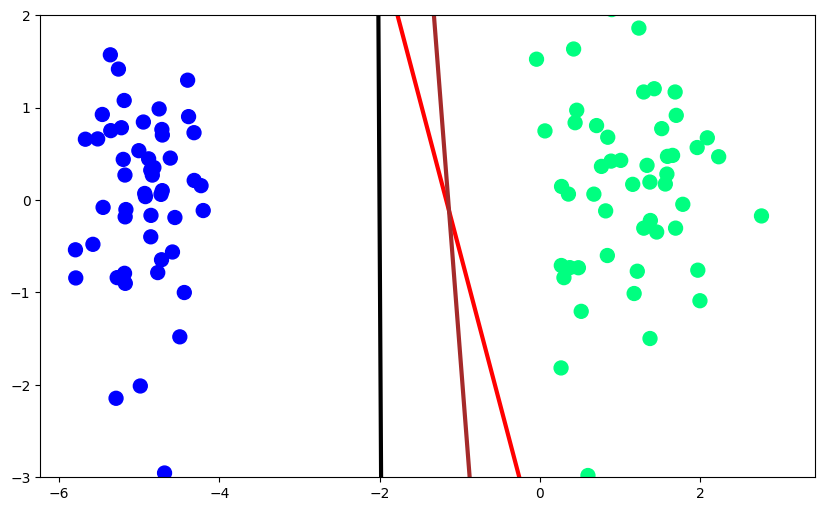

In [33]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.plot(x_input2,y_input2,color='brown',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

## Using Sigmoid with Gradient Descent to minimize loss

In [34]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [54]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]
        

In [55]:
coef_,intercept_ = gd(X,y)

In [56]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [57]:
x_input3 = np.linspace(-3,3,100)
y_input3 = m*x_input1 + b

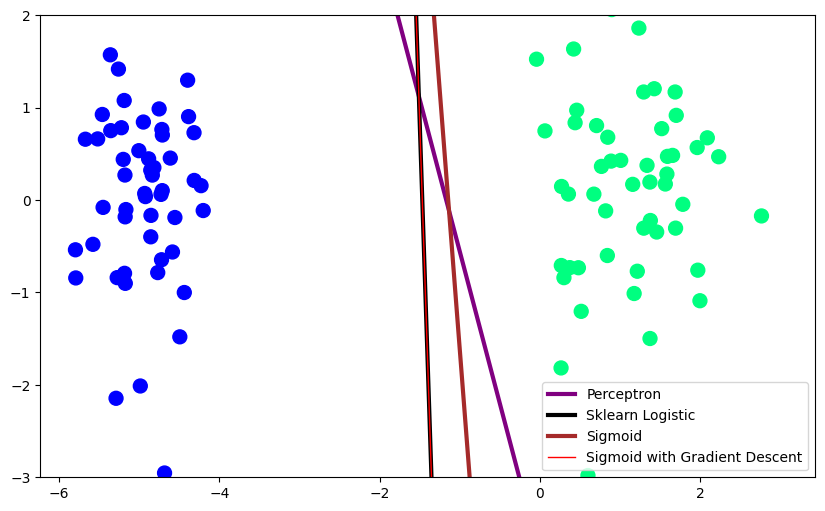

In [58]:
plt.figure(figsize=(10,6))
plt.plot(x_input, y_input, color='purple', linewidth=3, label='Perceptron')  # Perceptron
plt.plot(x_input1, y_input1, color='black', linewidth=3, label='Sklearn Logistic')  # Sklearn Logistic
plt.plot(x_input2, y_input2, color='brown', linewidth=3, label='Sigmoid')  # Sigmoid
plt.plot(x_input3, y_input3, color='red', linewidth=1, label='Sigmoid with Gradient Descent')  # Sigmoid with Gradient Descent
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=100)

plt.ylim(-3, 2)
plt.legend()  # Add legend to show labels
plt.show()